## Today's Task
**Task:** Hierarchical Clustering with Dendrogram Visualization.

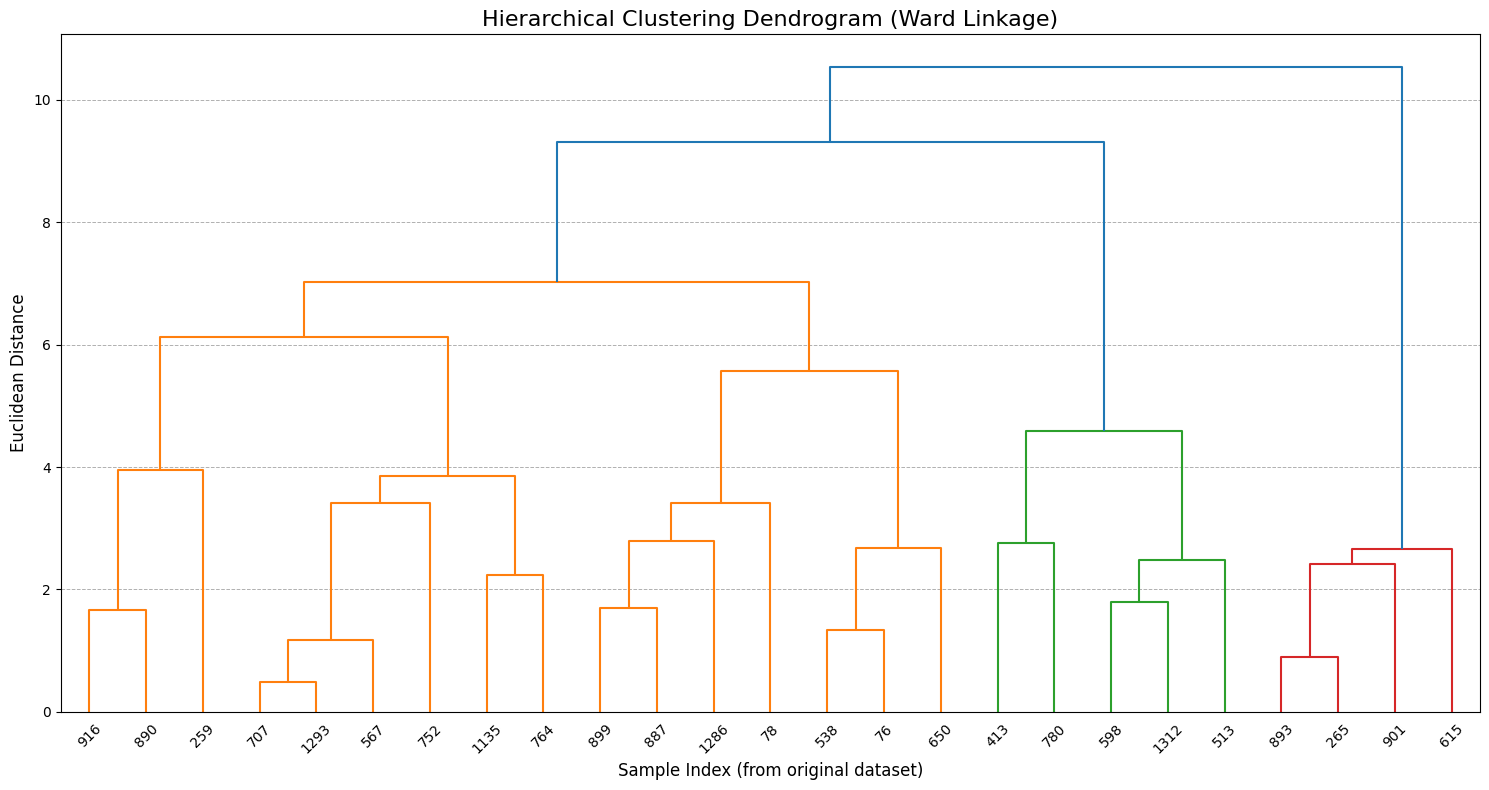

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the dataset
try:
    data = pd.read_csv('insurance.csv')
except FileNotFoundError:
    print("Error: 'insurance.csv' not found. Please ensure the file is in the correct directory.")
    exit()


# --- Data Preprocessing ---

# Convert categorical features to numerical using one-hot encoding
# drop_first=True helps to reduce multicollinearity
data_processed = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# For a readable dendrogram, we'll work with a sample of the data.
# Clustering the full dataset would make the visualization unreadable.
sample_data = data_processed.sample(n=25, random_state=42)

# Separate features (X) from the original indices
X = sample_data.copy()

# Scale the data to have zero mean and unit variance
# This is important because features are on different scales (e.g., age vs. charges)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame to maintain column names for clarity
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)


# --- Hierarchical Clustering ---

# Perform hierarchical clustering using the 'ward' linkage method.
# 'ward' minimizes the variance of the clusters being merged.
linked = linkage(X_scaled_df, method='ward')


# --- Dendrogram Visualization ---

# Create the plot
plt.figure(figsize=(15, 8))

# Generate the dendrogram
dendrogram(linked,
           orientation='top',
           labels=X_scaled_df.index, # Use original DataFrame index as labels
           distance_sort='descending',
           show_leaf_counts=True)

# Add titles and labels for clarity
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=16)
plt.xlabel('Sample Index (from original dataset)', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Display the plot
plt.tight_layout()
plt.show()


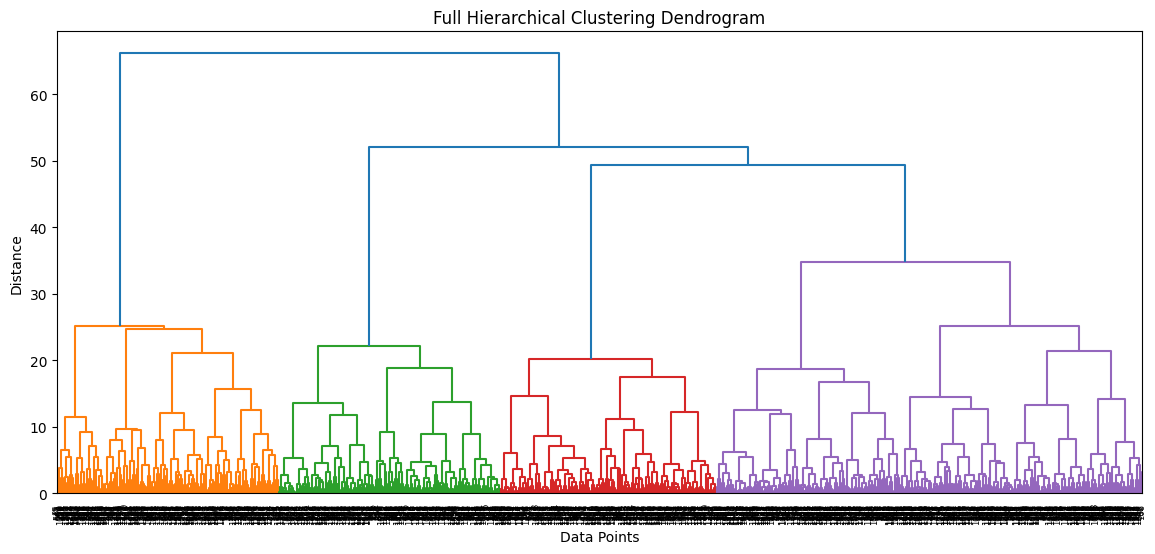

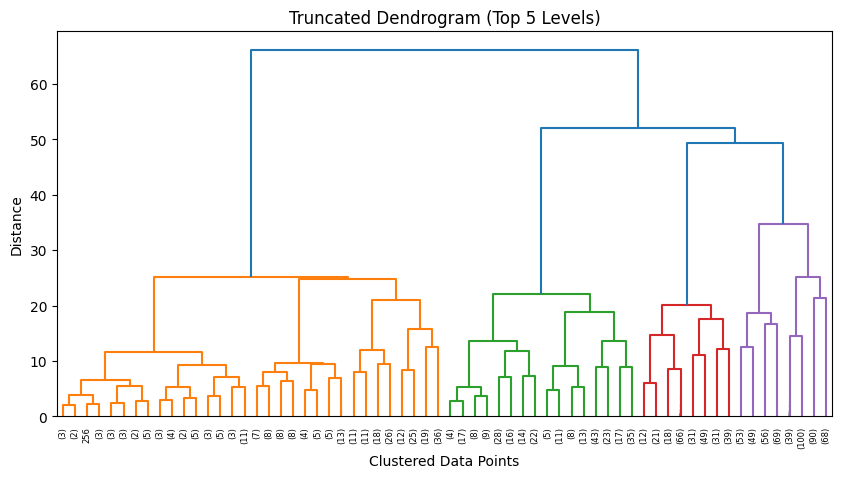

/var/folders/pd/cnvb6d5s3qz2yt0_lq2vt5180000gn/T/ipykernel_67333/1225014304.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=df, palette="viridis")


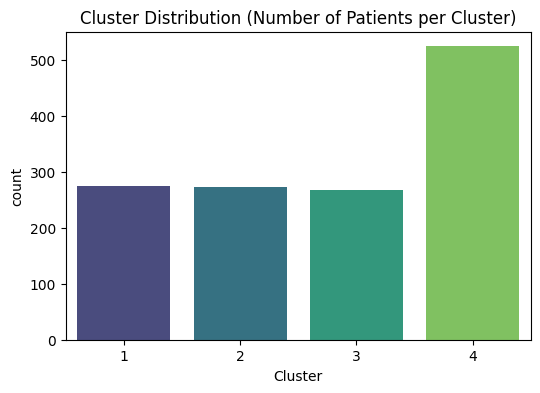

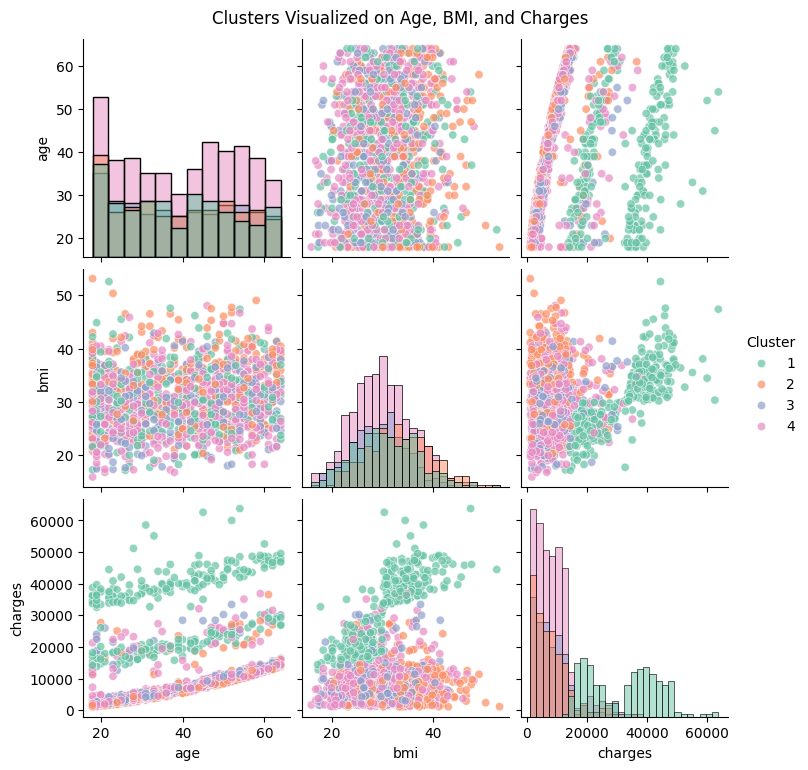

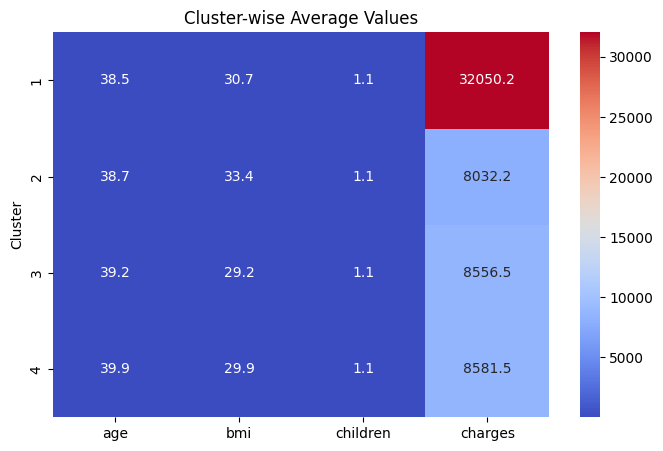


📊 Cluster Profile Summary:

               age                bmi                 children      \
              mean min max       mean     min    max      mean max   
Cluster                                                              
1        38.514599  18  64  30.708449  17.195  52.58  1.113139   5   
2        38.673993  18  64  33.442418  20.350  53.13  1.065934   5   
3        39.168539  19  64  29.212678  17.385  42.94  1.119850   5   
4        39.866412  18  64  29.931193  15.960  48.07  1.087786   5   

              charges                               sex   smoker     region  
                 mean         min          max <lambda> <lambda>   <lambda>  
Cluster                                                                      
1        32050.231832  12829.4551  63770.42801     male      yes  southeast  
2         8032.216309   1121.8739  36580.28216   female       no  southeast  
3         8556.463715   1621.3402  33471.97189   female       no  northwest  
4         85

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# ----------------------------
# 1. Load dataset
# ----------------------------
df = pd.read_csv("insurance.csv")

# ----------------------------
# 2. Encode categorical columns
# ----------------------------
df_encoded = pd.get_dummies(df, drop_first=True)

# ----------------------------
# 3. Standardize the data
# ----------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# ----------------------------
# 4. Perform Hierarchical Clustering
# ----------------------------
Z = linkage(scaled_data, method="ward")

# Extract clusters (example: 4 clusters)
clusters = fcluster(Z, t=4, criterion="maxclust")
df["Cluster"] = clusters

# ----------------------------
# 5. Visualizations
# ----------------------------

# Full Dendrogram
plt.figure(figsize=(14, 6))
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=6)
plt.title("Full Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Truncated Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5, show_contracted=True)
plt.title("Truncated Dendrogram (Top 5 Levels)")
plt.xlabel("Clustered Data Points")
plt.ylabel("Distance")
plt.show()

# Cluster Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Cluster", data=df, palette="viridis")
plt.title("Cluster Distribution (Number of Patients per Cluster)")
plt.show()

# Pairplot of clusters
sns.pairplot(
    df,
    vars=["age", "bmi", "charges"],
    hue="Cluster",
    palette="Set2",
    diag_kind="hist",
    plot_kws={"alpha": 0.7}
)
plt.suptitle("Clusters Visualized on Age, BMI, and Charges", y=1.02)
plt.show()

# Heatmap summary
cluster_summary = df.groupby("Cluster")[["age", "bmi", "children", "charges"]].mean()
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Cluster-wise Average Values")
plt.show()

# ----------------------------
# 6. Cluster Profile Report
# ----------------------------
cluster_profile = df.groupby("Cluster").agg({
    "age": ["mean", "min", "max"],
    "bmi": ["mean", "min", "max"],
    "children": ["mean", "max"],
    "charges": ["mean", "min", "max"],
    "sex": lambda x: x.mode()[0],
    "smoker": lambda x: x.mode()[0],
    "region": lambda x: x.mode()[0]
})

print("\n📊 Cluster Profile Summary:\n")
print(cluster_profile)

# Readable descriptions
for cluster_id, stats in cluster_profile.iterrows():
    print(f"\n🔹 Cluster {cluster_id} Profile:")
    print(f"   - Avg Age: {stats[('age','mean')]:.1f} "
          f"(Range: {stats[('age','min')]}–{stats[('age','max')]})")
    print(f"   - Avg BMI: {stats[('bmi','mean')]:.1f} "
          f"(Range: {stats[('bmi','min')]:.1f}–{stats[('bmi','max')]:.1f})")
    print(f"   - Avg Children: {stats[('children','mean')]:.1f} "
          f"(Max: {stats[('children','max')]})")
    print(f"   - Avg Charges: ${stats[('charges','mean')]:.2f} "
          f"(Range: {stats[('charges','min')]:.2f}–{stats[('charges','max')]:.2f})")
    print(f"   - Most Common Sex: {stats[('sex','<lambda>')]}")
    print(f"   - Smoker Majority: {stats[('smoker','<lambda>')]}")
    print(f"   - Dominant Region: {stats[('region','<lambda>')]}")

# ----------------------------
# 7. (Optional) Save Profiles
# ----------------------------
cluster_profile.to_csv("cluster_profiles.csv")
print("\n✅ Cluster profiles saved to 'cluster_profiles.csv'")


Displaying Heatmap of Scaled Data...


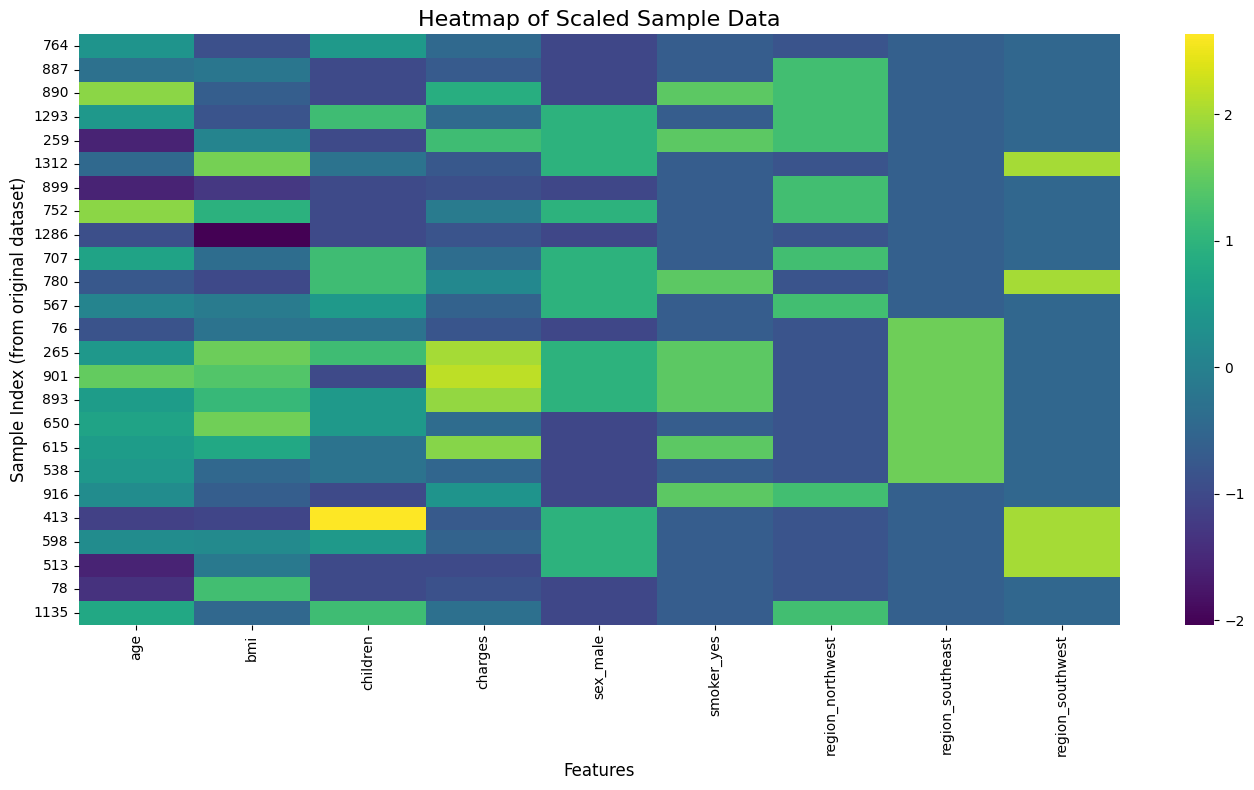


Displaying Enhanced Dendrogram...


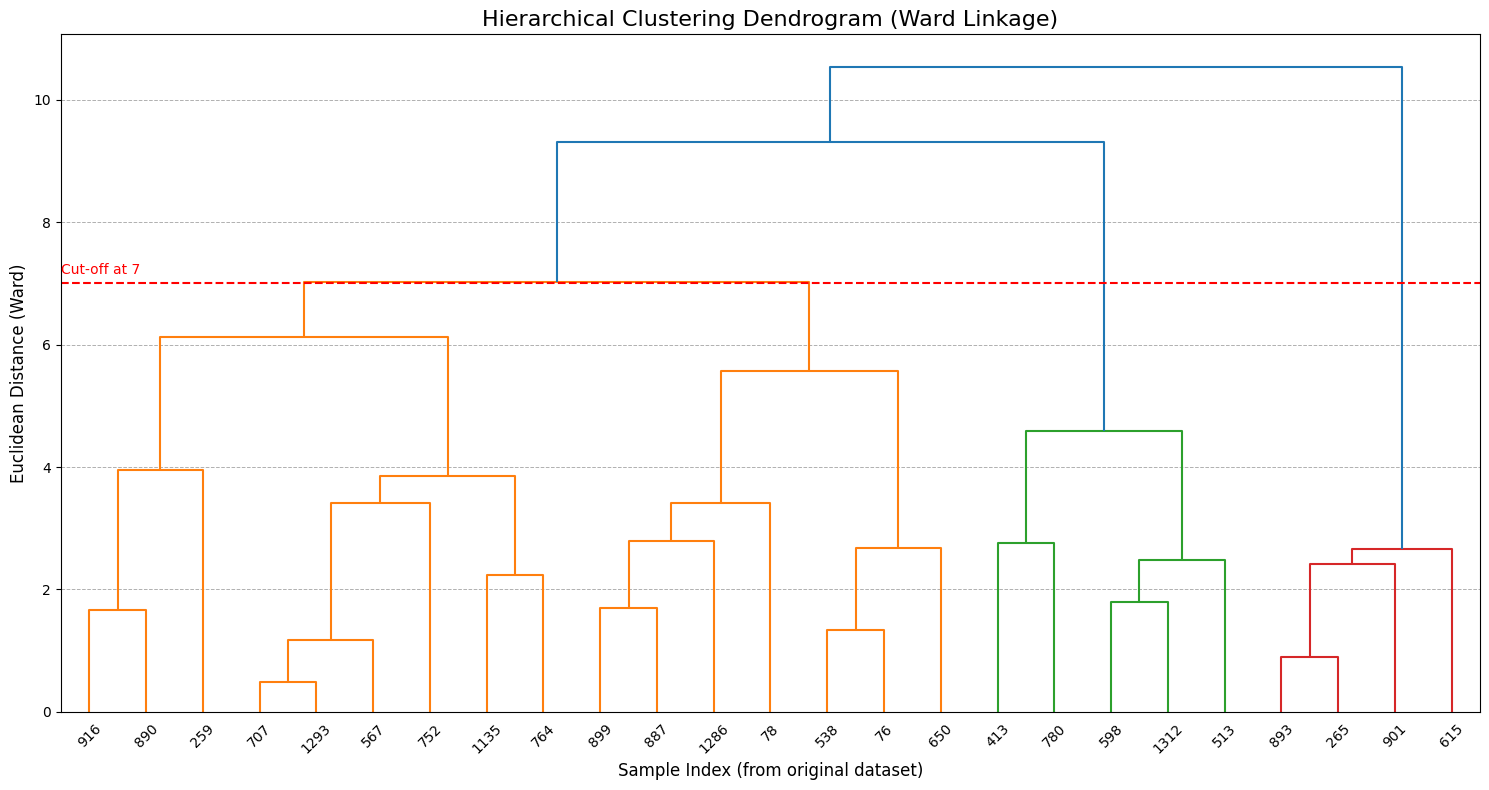


Displaying PCA Scatter Plot of Clusters...


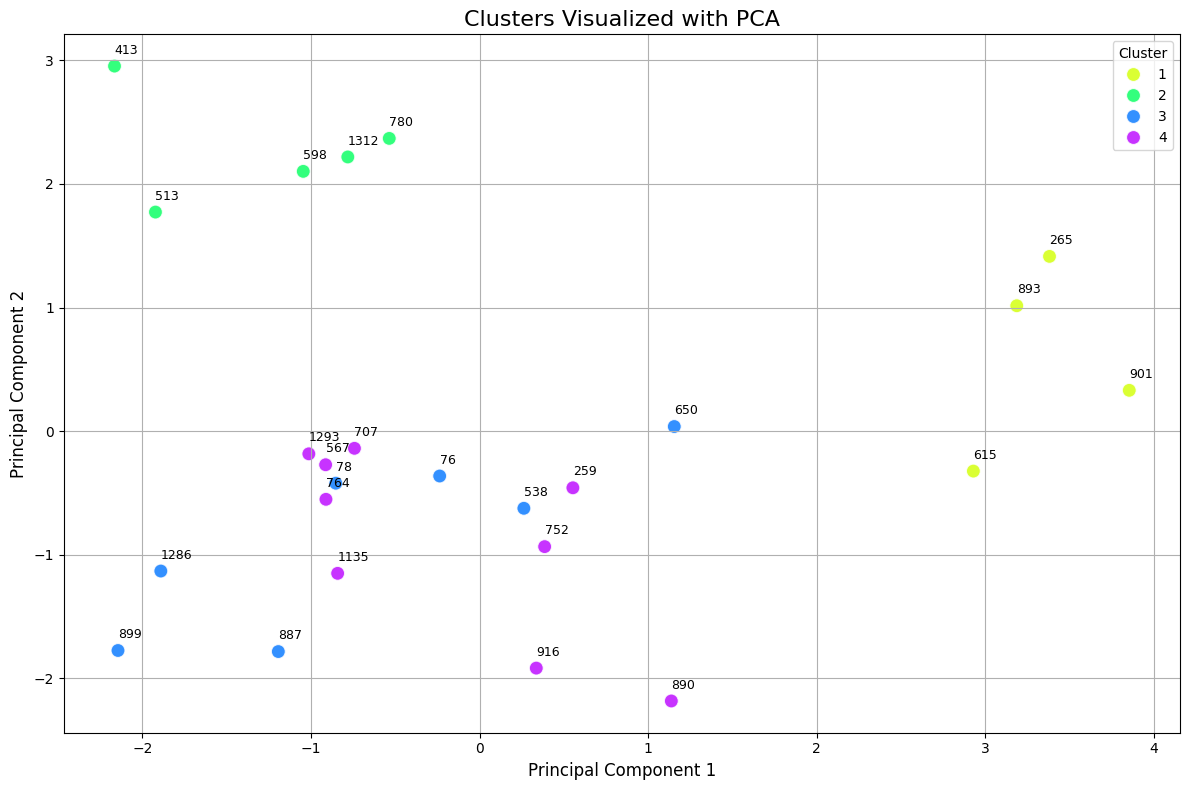

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
try:
    data = pd.read_csv('insurance.csv')
except FileNotFoundError:
    print("Error: 'insurance.csv' not found. Please ensure the file is in the correct directory.")
    exit()


# --- Data Preprocessing ---

# Convert categorical features to numerical using one-hot encoding
# drop_first=True helps to reduce multicollinearity
data_processed = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# For a readable dendrogram, we'll work with a sample of the data.
# Clustering the full dataset would make the visualization unreadable.
sample_data = data_processed.sample(n=25, random_state=42)

# Separate features (X) from the original indices
X = sample_data.copy()

# Scale the data to have zero mean and unit variance
# This is important because features are on different scales (e.g., age vs. charges)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame to maintain column names for clarity
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)


# --- Visualization 1: Heatmap of Scaled Data ---
# A heatmap helps visualize the magnitude of feature values across samples.
print("Displaying Heatmap of Scaled Data...")
plt.figure(figsize=(14, 8))
sns.heatmap(X_scaled_df, cmap='viridis', annot=False)
plt.title('Heatmap of Scaled Sample Data', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Sample Index (from original dataset)', fontsize=12)
plt.tight_layout()
plt.show()


# --- Hierarchical Clustering ---

# Perform hierarchical clustering using the 'ward' linkage method.
# 'ward' minimizes the variance of the clusters being merged.
linked = linkage(X_scaled_df, method='ward')


# --- Visualization 2: Enhanced Dendrogram ---
# The dendrogram shows the hierarchical relationship between samples.
# We add a line to show a potential cut for creating clusters.
print("\nDisplaying Enhanced Dendrogram...")
plt.figure(figsize=(15, 8))

dendrogram(linked,
           orientation='top',
           labels=X_scaled_df.index, # Use original DataFrame index as labels
           distance_sort='descending',
           show_leaf_counts=True)

# Add a horizontal line to indicate a potential cut for forming clusters
# This value is chosen by observing the dendrogram to create a reasonable number of clusters (e.g., 4)
cut_off_distance = 7
plt.axhline(y=cut_off_distance, color='r', linestyle='--')
plt.text(0, cut_off_distance + 0.1, f'Cut-off at {cut_off_distance}', color='r', va='bottom', ha='left')

plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=16)
plt.xlabel('Sample Index (from original dataset)', fontsize=12)
plt.ylabel('Euclidean Distance (Ward)', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


# --- Visualization 3: PCA Scatter Plot of Clusters ---
# PCA is used to reduce the high-dimensional data to 2 dimensions for plotting.
# This helps visualize the separation of the clusters.
print("\nDisplaying PCA Scatter Plot of Clusters...")

# Assign clusters based on the cut-off distance from the dendrogram
clusters = fcluster(linked, cut_off_distance, criterion='distance')

# Reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'], index=X.index)
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                palette=sns.color_palette('hsv', n_colors=len(pca_df['Cluster'].unique())),
                data=pca_df, s=100, alpha=0.8, legend='full')

# Annotate points with their sample index for better identification
for i in pca_df.index:
    plt.text(pca_df.loc[i, 'Principal Component 1'],
             pca_df.loc[i, 'Principal Component 2'] + 0.1,
             str(i),
             fontdict={'weight': 'light', 'size': 9})

plt.title('Clusters Visualized with PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

